In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Jun 11 12:37:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

     |████████████████████████████████| 440kB 13.5MB/s 
     |████████████████████████████████| 235kB 26.3MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import os
import random
from sklearn import preprocessing
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

from stellargraph import datasets
from IPython.display import display, HTML

In [ ]:
import random
from tqdm import tqdm
import networkx as nx
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
from __future__ import division
import networkx as nx
import math
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import stellargraph
from stellargraph.mapper import GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE
import networkx as nx
import pandas as pd
import numpy as np
import os
import random
from stellargraph import StellarDiGraph
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

from stellargraph import datasets
from IPython.display import display, HTML
from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, feature_extraction, model_selection
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
import urllib3
import matplotlib.pyplot as plt 
import numpy as np 
import requests
from lxml import etree
import re  
import chardet    
import random
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier  
import pandas as pd
import os
import multiprocessing
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import nltk
import csv
import networkx as nx
import pandas as pd
import numpy as np
import os
import random

import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

from stellargraph import datasets
from IPython.display import display, HTML
from tqdm import tqdm

In [ ]:
with open("/content/drive/MyDrive/web-polblogs.txt") as f:
    links = f.read().splitlines() 

len(links)

2281

In [ ]:
# captture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(links):
  node_list_1.append(i.split()[0])
  node_list_2.append(i.split()[1])

web_df = pd.DataFrame({'node_2': node_list_1, 'node_1': node_list_2})


100%|██████████| 2281/2281 [00:00<00:00, 517034.56it/s]


In [ ]:
web_df.head()

,node_1,node_2
0,1,1
1,1,528
2,1,570
3,1,976
4,1,1037


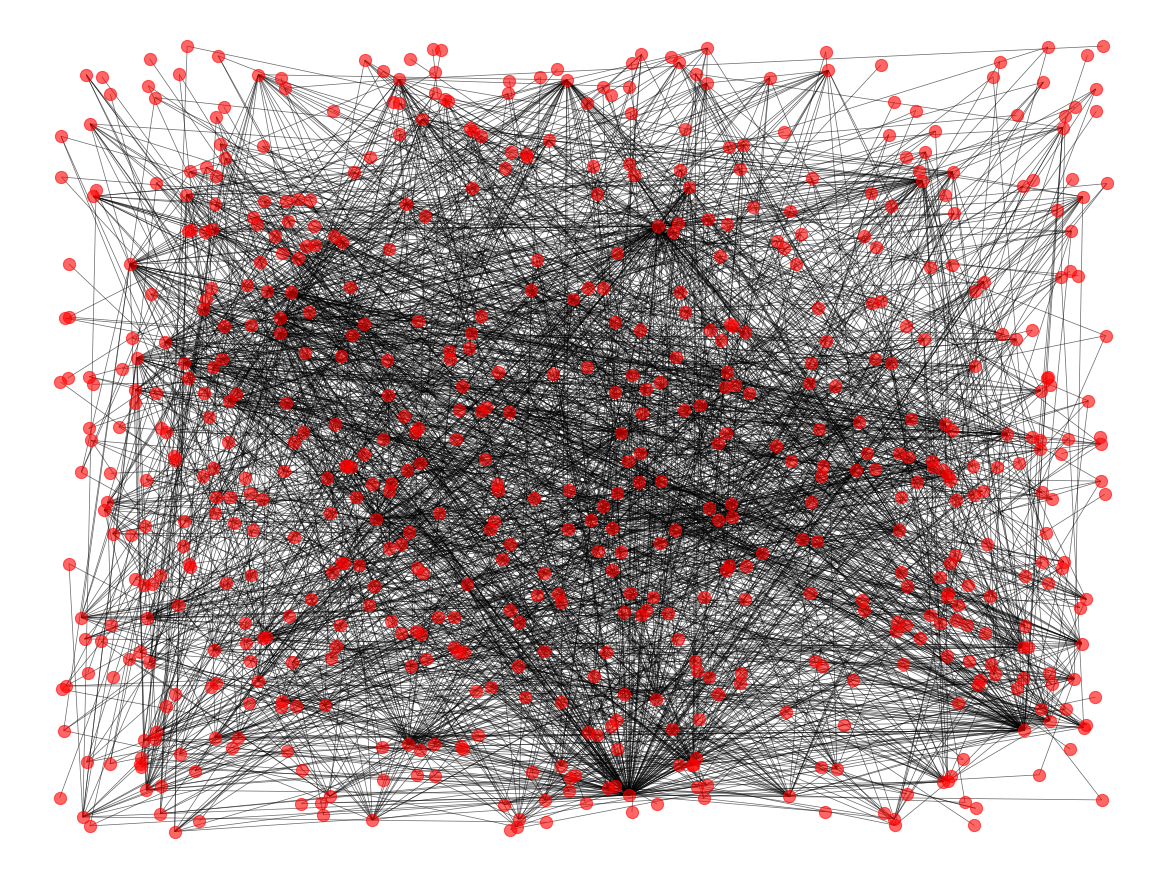

In [ ]:
# create graph
G = nx.from_pandas_edgelist(web_df, "node_1", "node_2", create_using=nx.Graph())

# plot graph
plt.figure(figsize=(16,12))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 150, alpha = 0.6, width = 0.7, node_color = 'red')

plt.show()

In [ ]:
# combine all nodes in a list
node_list = node_list_1 + node_list_2

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

# build adjacency matrix
adj_G = nx.to_numpy_matrix(G, nodelist = node_list)

In [ ]:
adj_G.shape

(643, 643)

In [ ]:
non_existing_edges = []
l= list(G.nodes())
offset = 0
for i in tqdm(range(adj_G.shape[0])):
  for j in range (offset, adj_G.shape[1]):
    if i!=j:
      if adj_G[i,j] == 0:
        non_existing_edges.extend([(l[i], l[j])])
  offset = offset+1


100%|██████████| 643/643 [00:00<00:00, 1742.83it/s]


In [ ]:
print(len(non_existing_edges))

204123


In [ ]:
nodes_4000 = sorted(random.sample(non_existing_edges, k=40000))

In [ ]:
non_existing_edges = [(i[0],i[1]) for i in tqdm(nodes_4000) if nx.has_path(G, i[0], i[1])]


100%|██████████| 40000/40000 [00:02<00:00, 15809.31it/s]


In [ ]:
non_existing_edges[:5]

[('1', '100'), ('1', '111'), ('1', '116'), ('1', '122'), ('1', '128')]

In [ ]:
df1 = pd.DataFrame(data = non_existing_edges, columns =['node_1', 'node_2'])
 
# create a column 'Connection' with default 0 (no-connection)
df1['Connection'] = 0
 
df1.head()

,node_1,node_2,Connection
0,1,100,0
1,1,111,0
2,1,116,0
3,1,122,0
4,1,128,0


In [ ]:
# Create a list of all indices of the node pairs in the fb dataframe,
# which when removed won’t change the structure of our graph
 
# create a copy
web_temp = web_df.copy()
 
# for storing removable edges
removable_edges_indices = []
 
# number of connected components and nodes of G
ncc = nx.number_connected_components(G)
number_of_nodes = len(G.nodes)
 
# for each node pair we will be removing a node pair and creating a new graph,
# and check if the number of connected components and the number of nodes
# are the same as the original graph
for i in tqdm(web_df.index.values):
  
      # remove a node pair and build a new graph
   G1 = nx.from_pandas_edgelist(web_temp.drop(index= i), "node_1", "node_2",
                                create_using=nx.Graph())
  
      # If the number of connected components remain same as the original
      # graph we won't remove the edge
   if (nx.number_connected_components(G1) == ncc) and (len(G1.nodes) == number_of_nodes):
       removable_edges_indices.append(i)
 
       # drop the edge, so that for the next iteration the next G1
       # is created without this edge
       web_temp = web_temp.drop(index = i)


100%|██████████| 2281/2281 [00:15<00:00, 144.76it/s]


In [ ]:
removable_edges_indices[:5]

[0, 2, 3, 5, 6]

In [ ]:
# get node pairs in fb dataframe with indices in removable_edges_indices
df2 = web_df.loc[removable_edges_indices]
 
# create a column 'Connection' and assign default value of 1 (connected nodes)
df2['Connection'] = 1
 
df2.head()

,node_2,node_1,Connection
0,643,643,1
2,77,2,1
3,106,2,1
5,19,3,1
6,78,3,1


In [ ]:
df1 = df1.append(df2[['node_1', 'node_2', 'Connection']],
                ignore_index=True)

In [ ]:
df1.head()

,node_1,node_2,Connection
0,1,100,0
1,1,111,0
2,1,116,0
3,1,122,0
4,1,128,0


In [ ]:
df3 = web_df.drop(index=df2.index.values)
df3.head()

,node_2,node_1
1,224,1
4,194,2
12,191,3
16,263,3
17,159,4


In [ ]:
G_new = nx.from_pandas_edgelist(df3, "node_1", "node_2",
                               create_using=nx.Graph())

print(nx.info(G_new))

Name: 
Type: Graph
Number of nodes: 643
Number of edges: 642
Average degree:   1.9969


In [ ]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-cp37-none-any.whl size=5982 sha256=8f99be75e914451addc6a0c15fef0ba85c42f015c60a652f960952dbb81bfa23
  Stored in directory: /root/.cache/pip/wheels/34/f4/60/55708b5e797260310451d919c8f898bbd4acd1901367001f20
Successfully built node2vec


In [ ]:
from node2vec import Node2Vec
 
# Generating walks
node2vec = Node2Vec(G_new, dimensions=100, walk_length=16, num_walks=50)
 
# training the node2vec model
n2v_model = node2vec.fit(window=7, min_count=1)


Generating walks (CPU: 1):   0%|          | 0/50 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]


In [ ]:

edge_features = [(n2v_model[str(i)]+n2v_model[str(j)])
for i,j in zip(df1['node_1'], df1['node_2'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, auc, roc_curve, roc_auc_score,confusion_matrix

In [ ]:
X = np.array(edge_features) 

In [ ]:
y = df1['Connection']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
#classifier
clf1 = RandomForestClassifier()
 
# parameters
param = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}
 
# model
grid_clf_acc1 = GridSearchCV(clf1, param_grid = param)
 
# train the model
grid_clf_acc1.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc1.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc1.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc1 = GridSearchCV(clf1, param_grid = param, scoring = 'roc_auc')
grid_clf_auc1.fit(X_train, y_train)
predict_proba = grid_clf_auc1.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc1.best_params_)
print('Grid best score (AUC): ', grid_clf_auc1.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 5, 'n_estimators': 10}
Grid best score (accuracy):  0.9607095987388694
Test set AUC:  0.829355198293552
Grid best parameter (max. AUC):  {'max_depth': 15, 'n_estimators': 100}
Grid best score (AUC):  0.8362599237853091


In [ ]:
# classifier
clf2 = GradientBoostingClassifier()
 
# parameters
param = {'learning_rate' : [.05,.1]}
 
# model
grid_clf_acc2 = GridSearchCV(clf2, param_grid = param)
 
# train the model
grid_clf_acc2.fit(X_train, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc2.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc2.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc2 = GridSearchCV(clf2, param_grid = param, scoring = 'roc_auc')
grid_clf_auc2.fit(X_train, y_train)
predict_proba = grid_clf_auc2.predict_proba(X_test)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc2.best_params_)
print('Grid best score (AUC): ', grid_clf_auc2.best_score_)

Grid best parameter (max. accuracy):  {'learning_rate': 0.05}
Grid best score (accuracy):  0.9604534091570407
Test set AUC:  0.8026020363593536
Grid best parameter (max. AUC):  {'learning_rate': 0.1}
Grid best score (AUC):  0.8024197024799923


In [ ]:
# classifier
clf3 = MLPClassifier(max_iter=1000)
 
# scaling training and test sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# parameters
param = {'hidden_layer_sizes' : [10,100,[10,10]], 'activation' : ['tanh','relu'], 'solver' : ['adam','lbfgs']}
 
# model
grid_clf_acc3 = GridSearchCV(clf3, param_grid = param)
 
# train the model
grid_clf_acc3.fit(X_train_scaled, y_train)
 
print('Grid best parameter (max. accuracy): ', grid_clf_acc3.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc3.best_score_)
 
# alternative metric to optimize over grid parameters: AUC
grid_clf_auc3 = GridSearchCV(clf3, param_grid = param, scoring = 'roc_auc')
grid_clf_auc3.fit(X_train_scaled, y_train)
predict_proba = grid_clf_auc3.predict_proba(X_test_scaled)[:,1]
 
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc3.best_params_)
print('Grid best score (AUC): ', grid_clf_auc3.best_score_)

Grid best parameter (max. accuracy):  {'activation': 'tanh', 'hidden_layer_sizes': 100, 'solver': 'adam'}
Grid best score (accuracy):  0.9619584082251393


In [ ]:
print('Test set AUC: ', roc_auc_score(y_test, predict_proba))
print('Grid best parameter (max. AUC): ', grid_clf_auc3.best_params_)
print('Grid best score (AUC): ', grid_clf_auc3.best_score_)

Test set AUC:  0.9152255858189227
Grid best parameter (max. AUC):  {'activation': 'relu', 'hidden_layer_sizes': 100, 'solver': 'lbfgs'}
Grid best score (AUC):  0.9129309412567164


In [ ]:
pred = grid_clf_auc3.predict(X_test_scaled)

In [ ]:
pred[:1325]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(pred,y_test)

0.9611911623439001

In [ ]:
confusion_matrix(pred,y_test)

array([[9896,  301],
       [ 103,  110]])

In [ ]:
predict_proba = grid_clf_auc3.predict_proba(X_test_scaled)[:,1]
 
false_positive_rate,true_positive_rate,_ = roc_curve(y_test, predict_proba)
roc_auc_score = auc(false_positive_rate,true_positive_rate)

Text(0, 0.5, 'True Positive Rate')

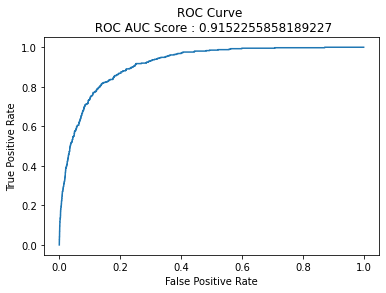

In [ ]:
plt.plot(false_positive_rate,true_positive_rate)
plt.title(f'ROC Curve \n ROC AUC Score : {roc_auc_score}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
df1

,node_1,node_2,Connection
0,1,100,0
1,1,111,0
2,1,116,0
3,1,122,0
4,1,128,0
...,...,...,...
41634,537,553,1
41635,552,613,1
41636,553,597,1
41637,553,621,1


In [ ]:
df1.loc[df1['Connection'] == 1].tail(20)

,node_1,node_2,Connection
41619,507,580,1
41620,507,591,1
41621,507,605,1
41622,507,611,1
41623,507,629,1
41624,508,513,1
41625,508,577,1
41626,513,547,1
41627,514,523,1
41628,514,559,1


In [ ]:
print(f' ({df1.iloc[4,0]},{df1.iloc[4,1]}) node pair features : {X[4]}')

# its position in X_train
print(f'Index of ({df1.iloc[4,0]},{df1.iloc[4,1]}) node pair in X_train : {np.where(X_train == X[4])[0][1]}')

 (1,128) node pair features : [-0.4089243   0.2575221  -0.75994205  0.5567769  -0.13172221 -0.20858684
  0.5620108   1.2240592   0.6286638  -0.45054254 -0.10477472  1.5634477
 -1.2581083  -0.2017689  -0.8355936   0.05538462 -1.1920342   0.19551058
 -0.27545878  0.1781856  -0.01639485 -0.07837671 -0.73396444  0.09822479
 -0.26140624 -0.18585762  0.18037142  0.2684538  -0.35442123 -0.97808117
  0.20829758 -0.34826148  0.25045064 -0.47669703 -0.67142475 -0.02082389
 -1.0941625  -0.60309327 -0.07518978 -0.01807487 -0.7246682  -0.3566162
 -0.6002596  -0.18343958 -0.8794589   0.0644606  -0.32282624  1.1816797
  0.26857647  0.5993081   0.5772183   1.7131405   0.04928231  0.7790177
 -0.4215269   0.28710386 -1.4681065   0.37551796  0.09202178  0.51794416
  0.19971785  0.4713171  -0.44393834  0.6222527  -0.47824484 -1.3592371
  0.35019886  0.798511    0.2831213  -0.0361564   0.06838726  0.5004547
  1.045288   -0.66044366  0.69406706 -0.0548356  -0.10595771  0.5616762
  0.0350144   1.5083902   0.

In [ ]:
predict_proba = grid_clf_auc3.predict_proba(X_train_scaled[np.where(X_train == X[4])[0][1]].reshape(1,-1))[:,1]
 
print(f'Probability of nodes {df1.iloc[4,0]} and {df1.iloc[4,1]} to form a link is : {float(predict_proba)*100 : .2f}%')

Probability of nodes 1 and 128 to form a link is :  1.22%
